In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# set version
version = 2
full = True

# load metrics
metrics = pd.read_csv(f"lightning_logs/version_{version}/metrics.csv").drop(
    columns="step"
)
if full:
    metrics = pd.read_csv("lightning_logs/full_64/metrics.csv").drop(
        columns="step"
    )
metrics

,dib_0,dib_1,dib_2,dib_3,dib_4,epoch,nc_layer_0,nc_layer_1,nc_layer_2,nc_layer_3,nc_layer_4,nc_output,train_loss
0,0.665352,0.665772,0.665414,0.665343,0.665380,0,184.180481,175.640671,162.157272,185.306519,171.824493,182.838501,0.695737
1,0.665352,0.665766,0.665424,0.665343,0.665405,1,0.738811,2.530696,4.528112,-0.927969,1.420564,-0.998345,0.693591
2,0.665352,0.665766,0.665424,0.665343,0.665403,2,-0.438380,-0.353991,-0.616664,1.458103,-0.085527,-0.999872,0.693729
3,0.665352,0.665763,0.665424,0.665343,0.665404,3,-0.946285,-0.961489,-0.995025,-0.842048,-0.805036,-0.999955,0.692875
4,0.665352,0.665762,0.665424,0.665343,0.665403,4,-0.793626,-0.994319,-0.989967,-0.876364,-0.803395,-0.999930,0.693156
5,0.665352,0.665762,0.665413,0.665342,0.665407,5,-0.831093,-0.985928,-0.987398,-0.739284,-0.781745,-0.999834,0.691458
6,0.665352,0.665771,0.665424,0.665343,0.665405,6,2.188911,-0.950291,-0.713198,-0.340048,-0.094001,-0.997913,0.694348
7,0.665352,0.665770,0.665424,0.665343,0.665405,7,-0.979166,-0.986966,-0.984914,-0.923330,-0.889398,-0.999973,0.692088
8,0.665352,0.665762,0.665424,0.665342,0.665407,8,1.119371,-0.883554,-0.931512,0.626096,-0.427760,-0.998567,0.694508
9,0.665352,0.665769,0.665424,0.665343,0.665403,9,4.147289,-0.942959,-0.775271,0.793243,1.287276,-0.999757,0.693309


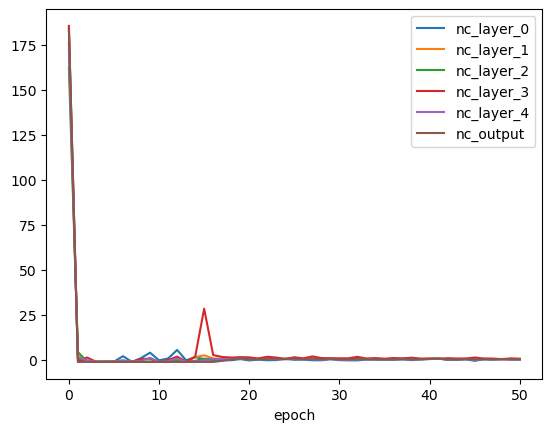

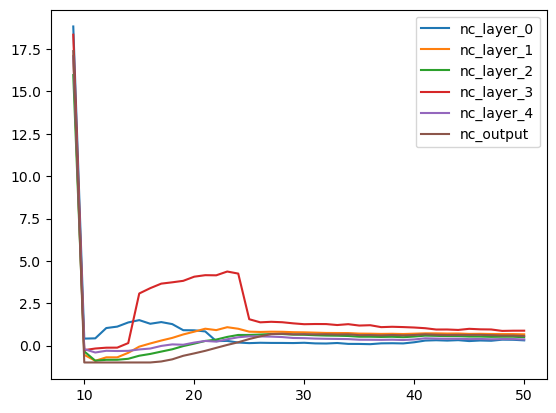

In [10]:
# plot NC1
nc_cols = metrics.columns[metrics.columns.str.contains("nc_")]
metrics.plot(x="epoch", y=nc_cols)
# plt.ylim(0,1)
# plt.xlim(0,20)
plt.show()

# plot rolling average (window size == 10)
rolling_avg = metrics[nc_cols].rolling(10).mean()
plt.plot(metrics["epoch"], rolling_avg, label=rolling_avg.columns)
plt.legend()
# plt.ylim(0,1)
# plt.xlim(9,20)
plt.show()

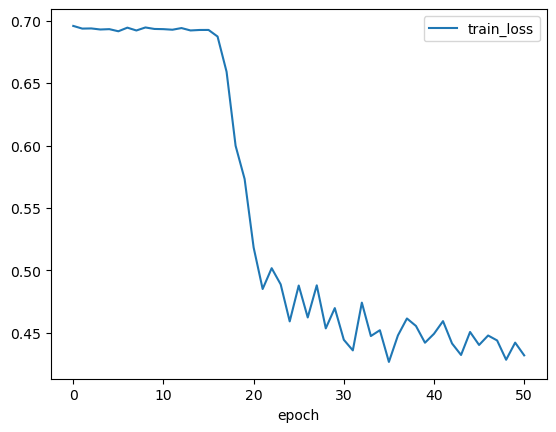

In [11]:
# plot train loss
metrics.plot(x="epoch", y=["train_loss"])
# plt.ylim(0.3,0.9)
# plt.xlim(0,20)
plt.show()

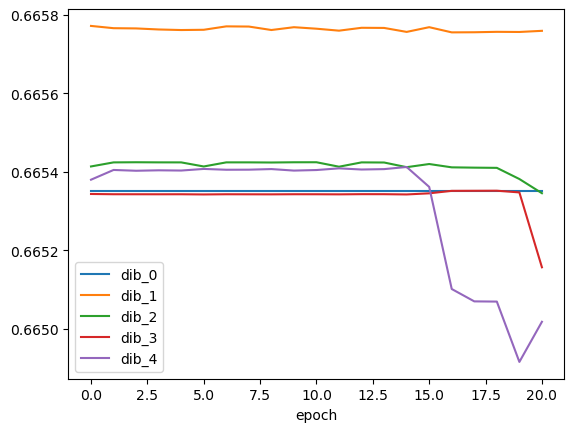

In [12]:
# remove NaN rows
no_nan = metrics.dropna()

# plot DIB
dib_cols = metrics.columns[metrics.columns.str.contains("dib_")]
no_nan.plot(x="epoch", y=dib_cols)
plt.show()

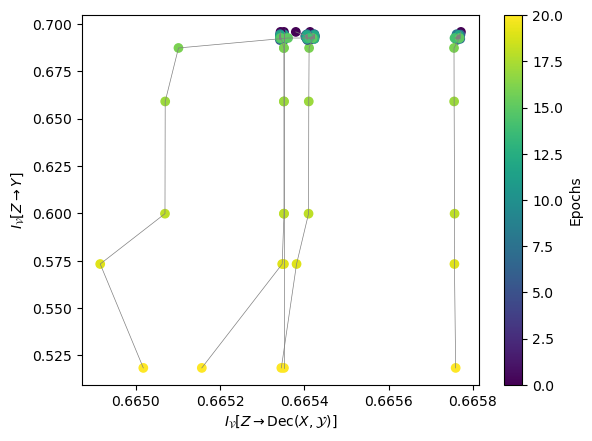

In [13]:
# IP analysis
for dib in dib_cols:
    plt.scatter(metrics[dib], metrics["train_loss"], cmap="viridis", c=metrics["epoch"])
    plt.plot(metrics[dib], metrics["train_loss"], color="gray", linewidth=0.5)
plt.xlabel(r"$I_{\mathcal{V}}[Z \to \operatorname{Dec}(X,\mathcal{Y})]$")
plt.ylabel(r"$I_{\mathcal{V}}[Z \to Y]$")
plt.colorbar(label="Epochs")
plt.show()